# Artificial Neural Network - Predicting the Strength of the concrete

### Part 1 - Data Preprocessing

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Loading the data
data = pd.read_csv('https://raw.githubusercontent.com/datasciencelearnofficial/Deep-Learning/master/Datasets/Concrete_Strength/concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


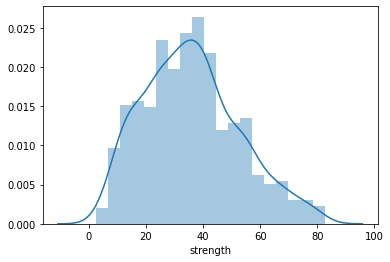

In [5]:
# Checking the distribution of dependent feature (Strength colum)
sns.distplot(data["strength"])

The dependent feature "strength" slightly right skewed and the mean values lies at value 40. To test whether the concrete is in strength or not we have to convert the dependent feature from continuous to categorical value.

So, we are creating a binning categorical column contaning the values 0 or 1.

- If strength value is greater than 40, then 1
- If strength value is less than 40, then 0

In [6]:
# creating a new column "strength_cat" with the help of lambda function
data["strength_cat"] = data["strength"].apply(lambda x : 1 if x > 40 else 0)
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0


In [7]:
# Dropping the strength column with continuous values as it is not necessary
data.drop(columns = "strength", axis = 1, inplace = True)
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,0


In [8]:
# Seperating the independent features from the data
X = data.iloc[:,:8]
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [9]:
# Seperating the dependent features from the data
Y = data.iloc[:,8]
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: strength_cat, dtype: int64

In [10]:
# Splitting the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(824, 8)
(824,)
(206, 8)
(206,)


In [11]:
# Feature Scaling : Standardizing the indepndent features so that, they remain in same scale between (-1, 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part 2 - Building a Artificial Neural Network Model

In [17]:
# Importing the Keras libraries

from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [18]:
# Initializing the ANN Model
classifier = Sequential()

In [19]:
# Create a function given an activation and learning rate as input parameter
def create_model(learning_rate=0.01, activation='relu'):
  
  # Create a binary classification model  
  model = Sequential()
  model.add(Dense(128, activation = activation, input_dim = 8, activity_regularizer=regularizers.l2(1e-5)))
  model.add(Dropout(0.50))
  model.add(Dense(128, activation = activation, activity_regularizer=regularizers.l2(1e-5)))
  model.add(Dropout(0.50))
  model.add(Dense(1, activation = activation))
  
  # Compile the model
  model.compile(optimizer = Adam(learning_rate = learning_rate), loss = "binary_crossentropy", metrics=['accuracy'])
  
  return model

In [21]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the parameters to try out
params = {'activation': ["relu", "tanh", "sigmoid"],
          'batch_size': [16, 32, 64, 128, 256], 
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}

# Create a GridSearchCV object passing in the parameters to find the best parameters for our model
random_search = RandomizedSearchCV(model, param_distributions = params)

random_search_results = random_search.fit(X_train, Y_train)

In [23]:
# Best parameters for the model
print("Best Score: ", random_search_results.best_score_, "and Best Params: ", random_search_results.best_params_)

Best Score:  0.8859423518180847 and Best Params:  {'learning_rate': 0.01, 'epochs': 100, 'batch_size': 16, 'activation': 'sigmoid'}


### Part 3 - Making the predictions and evaluating the model

In [33]:
# Importing the Model evaluation libraries for classification problem
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Predicting the test results
Y_pred = random_search_results.predict(X_test)

In [27]:
# Making the Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

[[126   6]
 [ 13  61]]


In [28]:
# Calculate the Accuracy score
print(accuracy_score(Y_test, Y_pred))

0.9077669902912622


In [30]:
# Calculate the Precision score
print(precision_score(Y_test, Y_pred))

0.9104477611940298


In [31]:
# Calculate the Recall score
print(recall_score(Y_test, Y_pred))

0.8243243243243243


In [34]:
# Calculate the F1 score
print(f1_score(Y_test, Y_pred))

0.8652482269503546


Hence, we could able to develop a ANN model which could predict the strength of the concrete with 90% accuracy.